<a href="https://colab.research.google.com/github/toraaglobal/deeplearning/blob/pytorch/Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation

In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [3]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [4]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.033089838969682
Training loss: 0.5605184560391441
Training loss: 0.4899654548877338


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [6]:
ps = torch.exp(logps)
ps

tensor([[2.3430e-06, 2.8815e-07, 5.6288e-06, 1.1077e-06, 4.0384e-06, 1.0569e-01,
         6.3070e-06, 3.2140e-01, 6.3758e-03, 5.6652e-01]])

In [7]:
nps = ps.numpy()[0]
nps

array([2.3430480e-06, 2.8814526e-07, 5.6288118e-06, 1.1076867e-06,
       4.0383902e-06, 1.0568936e-01, 6.3070252e-06, 3.2139966e-01,
       6.3757654e-03, 5.6651556e-01], dtype=float32)

In [ ]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boots']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

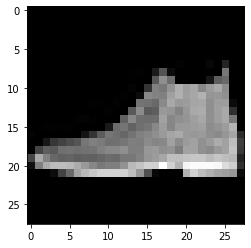

In [8]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

In [9]:
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[2.3430e-06, 2.8814e-07, 5.6288e-06, 1.1077e-06, 4.0384e-06, 1.0569e-01,
         6.3070e-06, 3.2140e-01, 6.3758e-03, 5.6652e-01],
        [1.2405e-03, 4.1931e-05, 8.9792e-01, 1.9242e-04, 1.7917e-02, 9.1150e-06,
         8.1883e-02, 5.5351e-09, 7.9569e-04, 3.6542e-07],
        [3.3303e-05, 9.9975e-01, 3.0523e-05, 1.1709e-04, 7.1877e-05, 2.6031e-08,
         2.3260e-07, 6.9498e-07, 8.3005e-09, 1.2535e-08],
        [8.5251e-06, 9.9945e-01, 3.6763e-05, 4.5247e-04, 4.7740e-05, 1.9064e-07,
         1.7516e-07, 3.0779e-06, 1.6256e-08, 8.6729e-08],
        [1.4154e-01, 4.8412e-04, 1.4631e-01, 1.4264e-02, 1.0468e-02, 2.2262e-04,
         6.7741e-01, 1.1878e-06, 9.2858e-03, 1.0557e-05],
        [4.0952e-03, 9.8334e-01, 9.1337e-04, 2.7837e-03, 8.6983e-03, 6.3261e-07,
         1.5853e-04, 5.1091e-06, 2.2740e-06, 3.2677e-07],
        [2.6016e-02, 9.8000e-04, 5.6760e-02, 1.4168e-03, 6.8504e-01, 1.2583e-04,
         2.2612e-01, 1.1312e-06, 3.5336e-03, 1.4539e-06],
        [7.4768e-03, 2.2023

In [10]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)


In [11]:
pred, labels

(tensor([3, 0, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]))

In [12]:
pred == labels

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])

In [13]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model on the 10000 test images: 82.1% 
